In [1]:
import mceh.model.all_zm_model_schechter as fitting
import mceh.utility as ut
import matplotlib.pyplot as plt
import numpy as np
import importlib
import mceh.find_luminosity as fl

Call manual() to get the manual.


In [11]:
importlib.reload(fitting)
importlib.reload(ut)

<module 'mceh.utility' from '/home/hylin/workspace/mceh/utility.py'>

In [2]:
result = ut.pickle_load('result/mcmc20241222_continue.pickle')

In [3]:
efeds = ut.init('efeds')

In [55]:
print(efeds['area'][:10])
print(efeds['unmasked_area'][:10])

[  20.96875495   25.97175197   26.56712972   42.6935195    98.68232259
   33.58541037   39.56980444 1404.56108842   73.19150623   61.09131689] arcmin2
[  17.13    8.56   19.54   37.15   82.13    0.     32.44 1092.99   38.21
   34.3 ] arcmin2


In [4]:
mcmc_dict = result['mcmc_dict']

In [5]:
sampler = result['sampler']

In [7]:
def plot_step(sampler,
              show_index,
              label=['A', 'B', r'$\alpha$', r'$\Delta m$'],
              title=None):
    """Plot the steps of the MCMC
    
    Args:
        sampler (EnsembleSampler): The MCMC sampler.
        show_index (int list): A list of paramter indicies you want to plot.
        label (str list): A list of parameter names shown on the plot.
        title (str): Title of the plot.
    """
    samples = sampler.get_chain()
    height = 1 + 2 * len(show_index)
    fig, axes = plt.subplots(len(show_index), figsize=(10, height), sharex=True)
    fig.subplots_adjust(hspace=0)
    ndim = len(show_index)
    for i in range(len(show_index)):
        ax = axes[i]
        this_chain = samples[:, :, show_index[i]]
        mean = np.mean(this_chain, axis = 1)
        median = np.median(this_chain, axis = 1)
        std = np.std(this_chain, axis = 1)
        ax = axes[i]
        ax.plot(this_chain, "k", alpha=0.3)
        ax.plot(median, color = 'lightblue')
        ax.plot(median + std, color = 'orange')
        ax.plot(median - std, color = 'orange')
        ax.grid()
        ax.set_xlim(0, len(samples))
        if label is not None:
            ax.set_ylabel(label[i], fontsize=16)
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
    if title is not None:
        plt.suptitle(title)

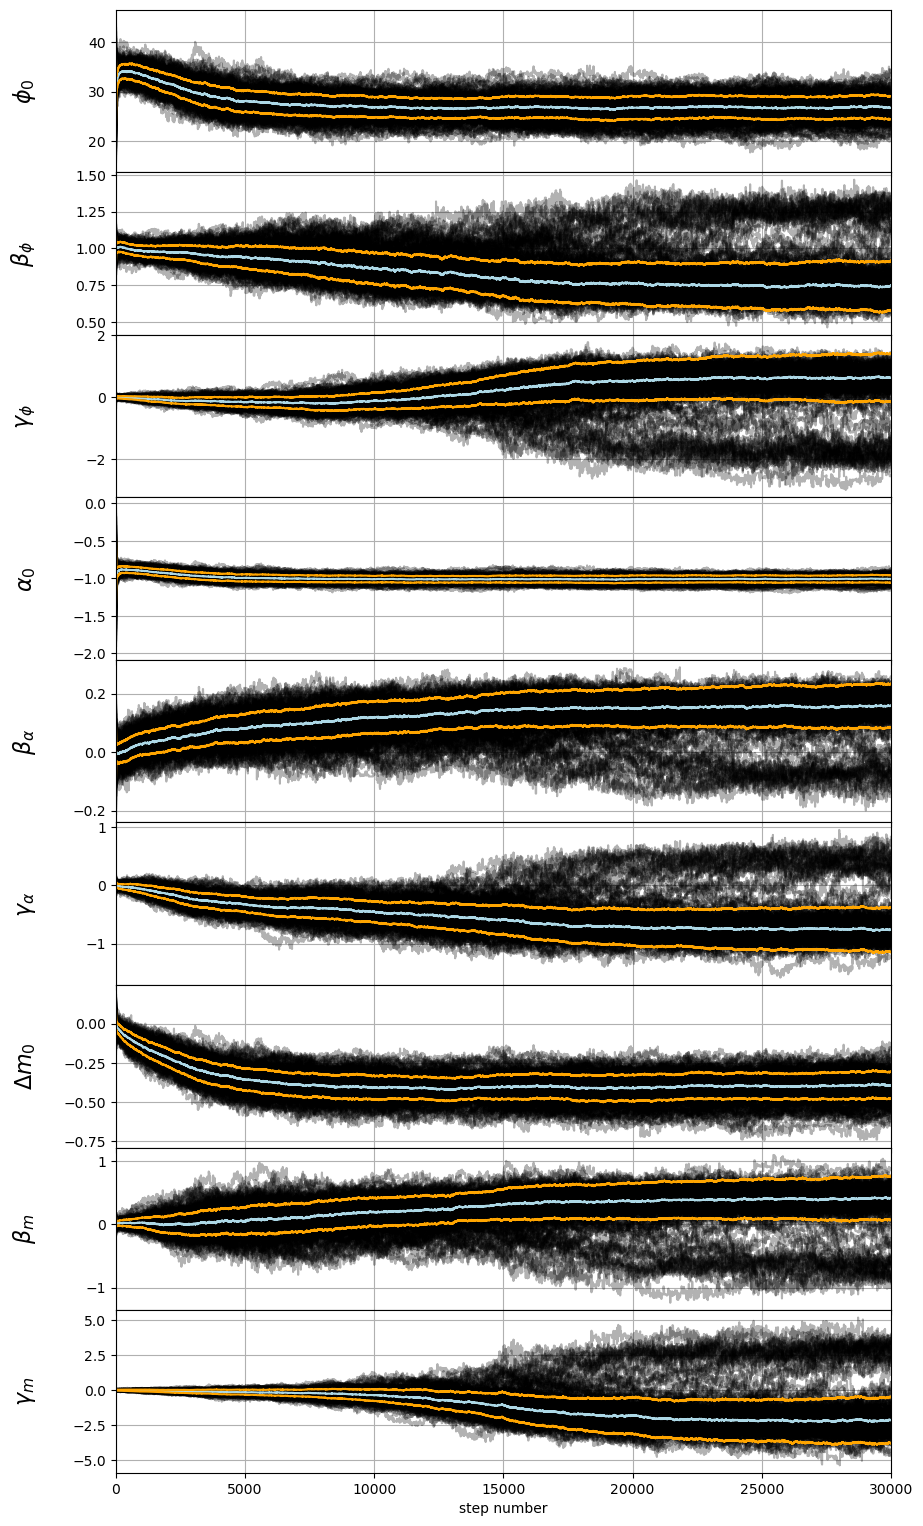

In [8]:
order = [0, 1, 4, 2, 5, 6, 3, 7, 8]
plot_step(sampler, show_index=order, label=np.array(fitting.LABELS)[order]) # phi

In [20]:
chain = sampler.get_chain(discard=29500, thin=50, flat=True)

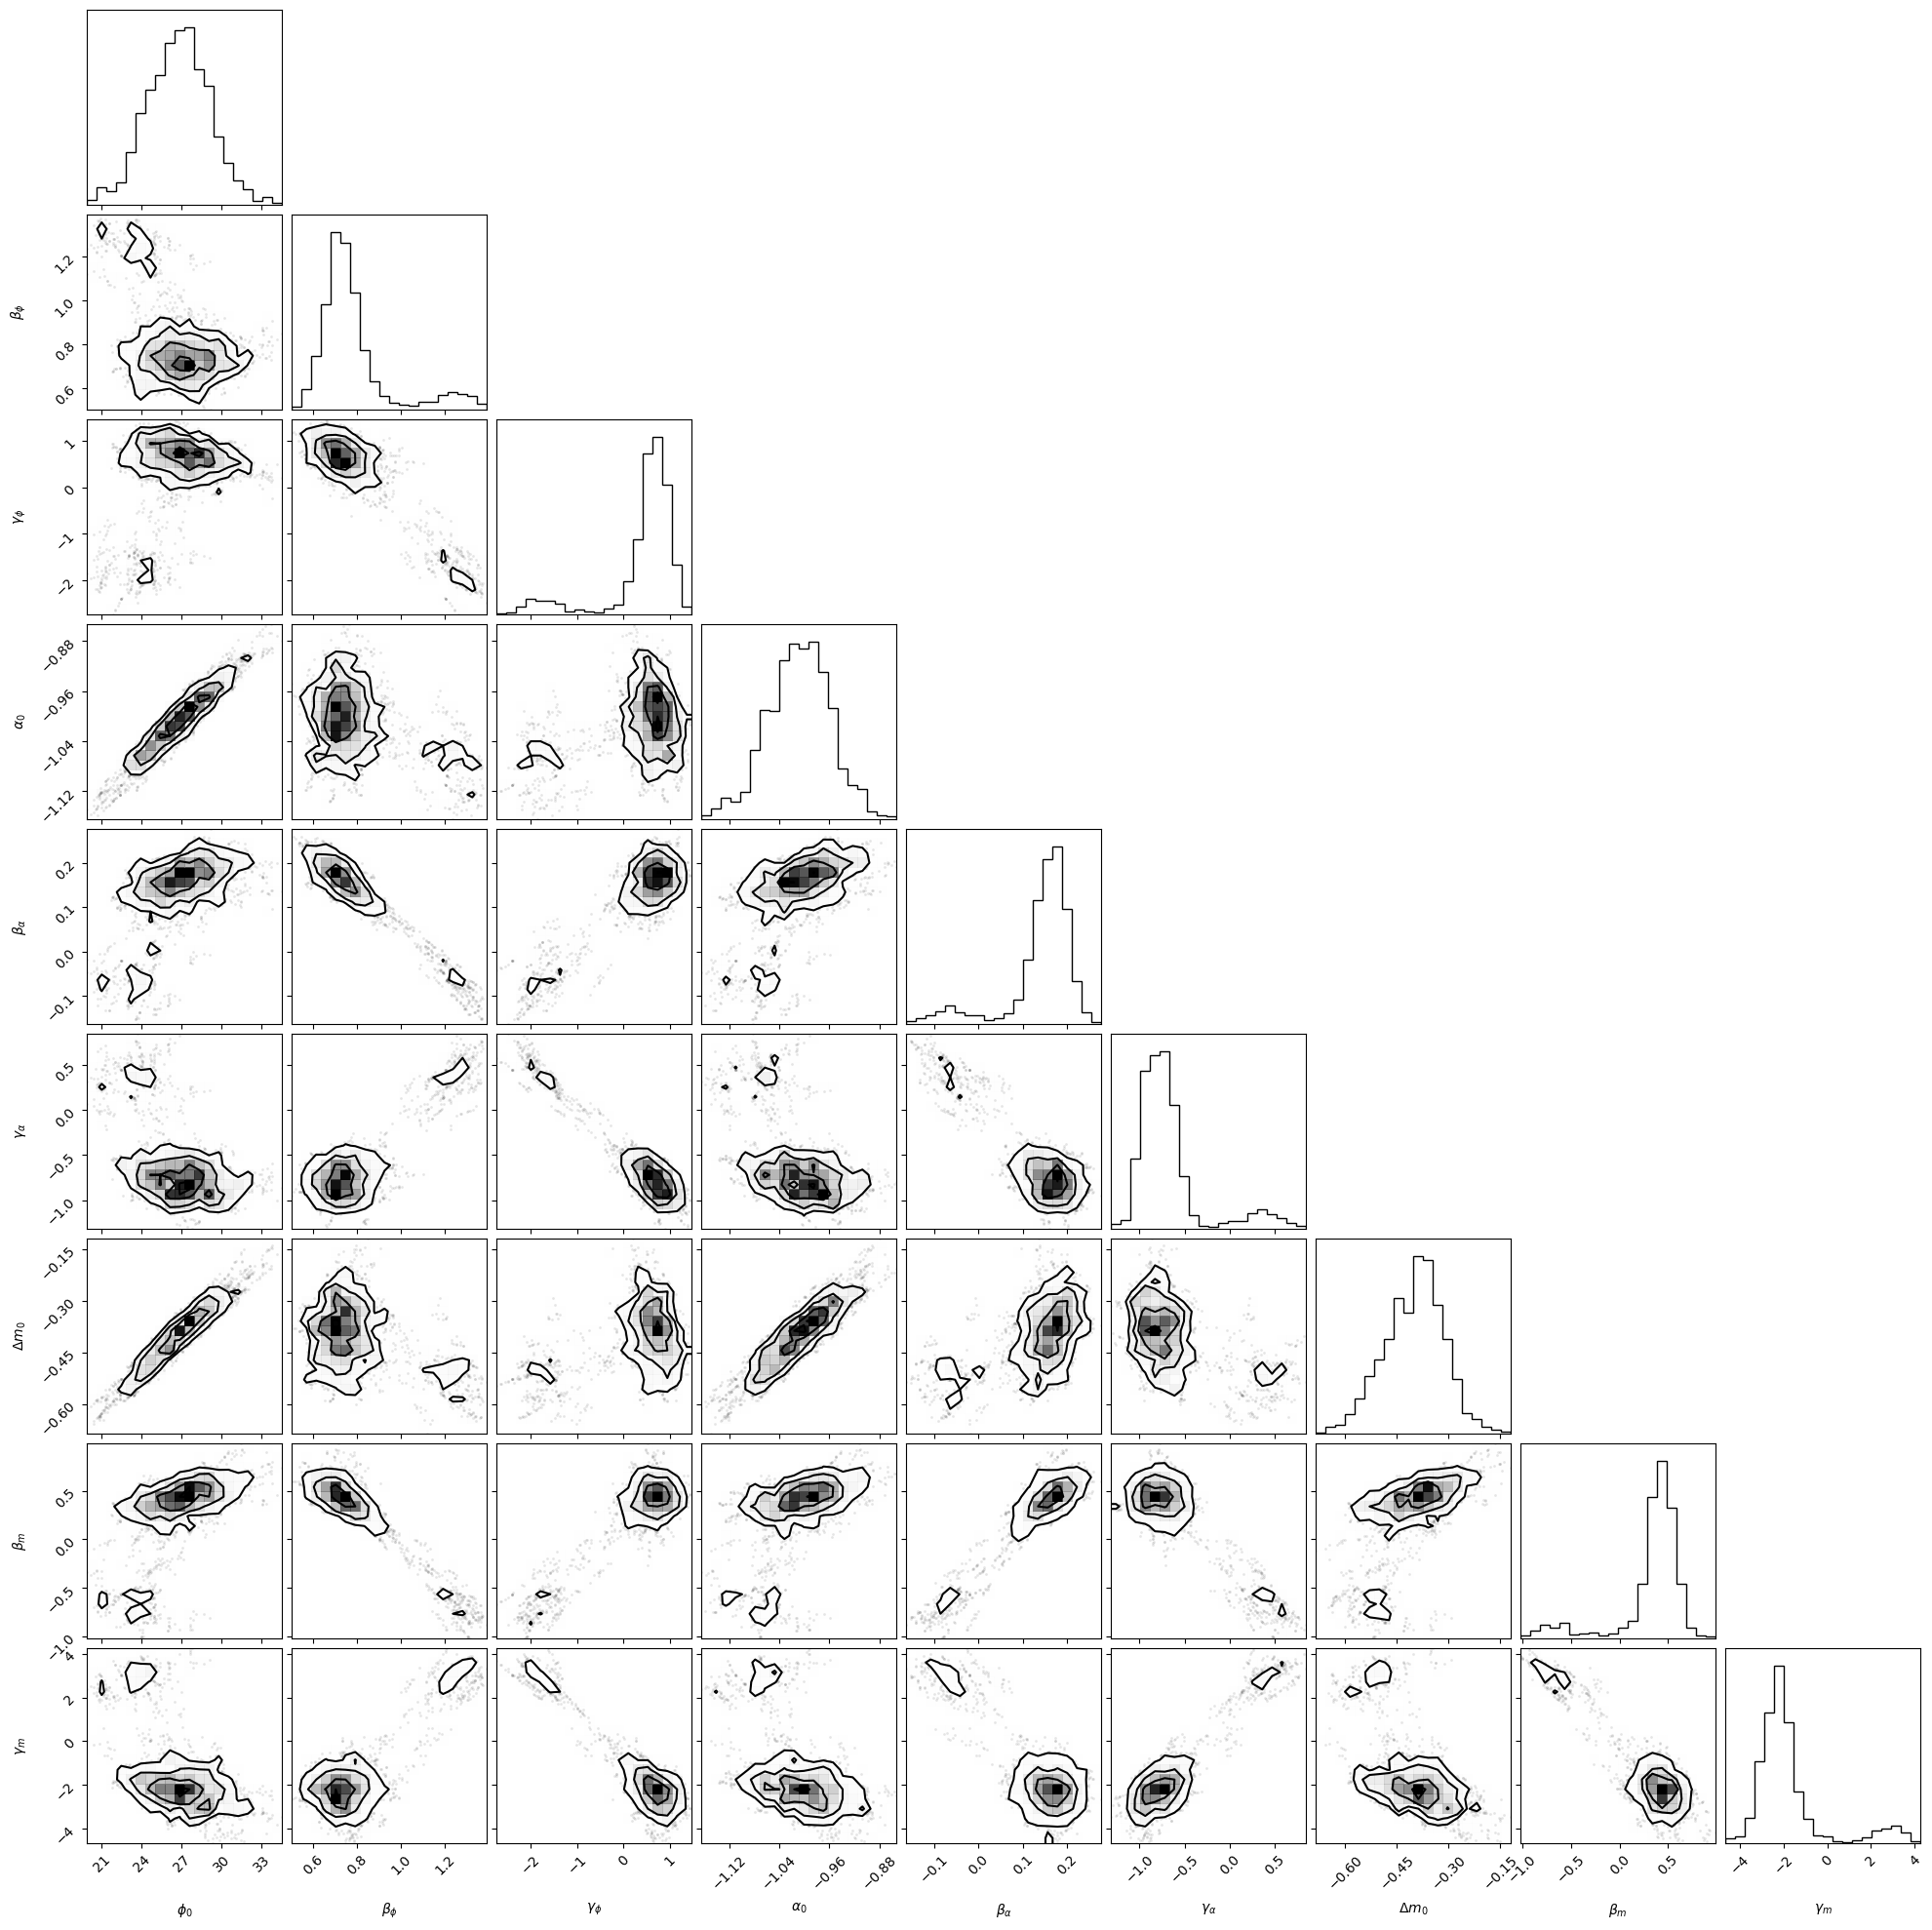

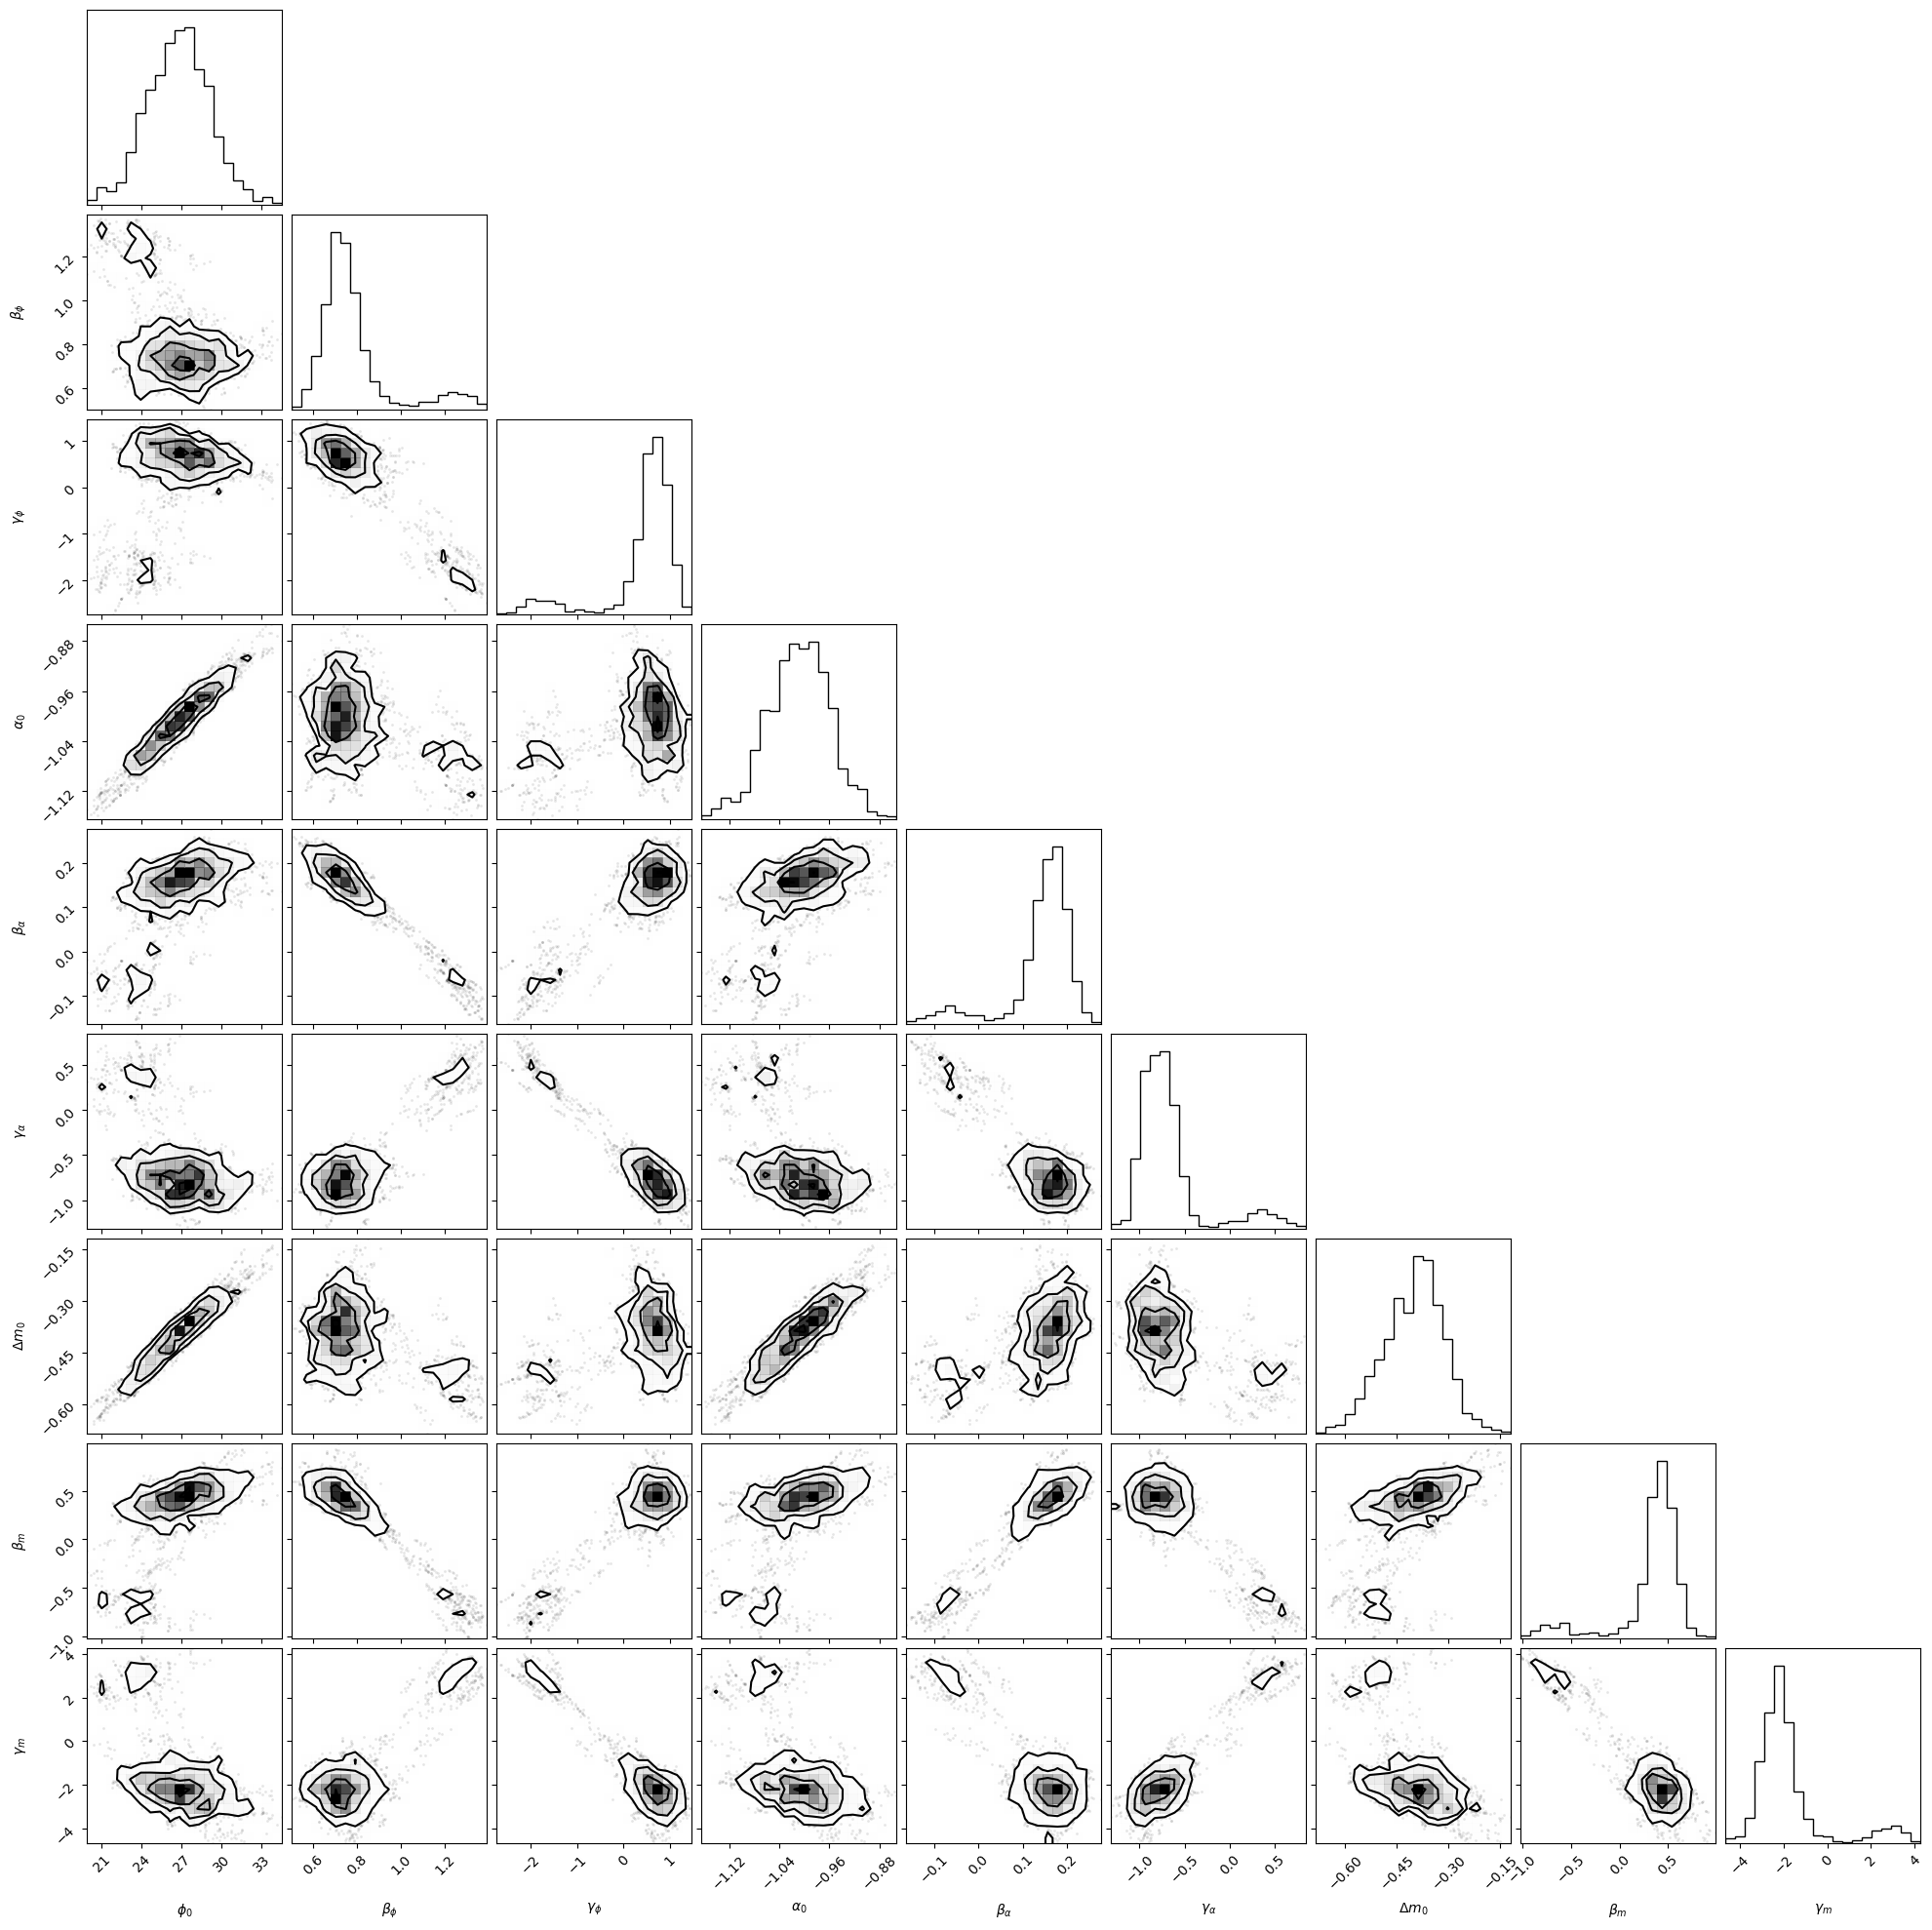

In [23]:
import corner
corner.corner(chain[:,order], labels=np.array(fitting.LABELS)[order])

In [29]:
band = mcmc_dict['band']
band_index = []
band_name = ['g', 'r', 'i', 'z', 'y']
for i in range(5):
    band_index.append(np.where(band == band_name[i])[0])
band_index

[array([], dtype=int64),
 array([  0,   3,   4,   8,   9,  10,  11,  13,  14,  15,  16,  17,  19,
         20,  21,  26,  28,  30,  33,  35,  37,  38,  40,  42,  43,  44,
         46,  47,  48,  51,  52,  53,  54,  57,  58,  61,  62,  64,  67,
         68,  69,  70,  74,  76,  77,  78,  81,  82,  86,  90,  92,  93,
         94,  95,  97,  98, 104, 105, 106, 108, 111, 112, 113, 114, 116,
        117, 118, 121, 122, 123, 124, 126, 127, 129, 130, 131, 134, 135,
        137, 138, 140, 142, 144, 153, 154, 163, 168, 169, 172, 176, 180,
        183, 184, 185, 189, 191, 193, 196, 199, 205, 206, 208, 209, 210,
        211, 212, 214, 215, 217, 218, 224, 227, 228, 235, 239, 240, 241,
        242, 243, 247, 249, 250, 253, 255, 256, 259, 260, 263, 264, 267,
        268, 274, 275, 278, 279, 281, 284, 285, 286, 287, 291, 292, 293,
        294, 296, 297, 299, 301, 302, 303, 305, 308, 309, 310, 312, 313,
        315, 316]),
 array([  1,   2,   5,   6,   7,  12,  18,  22,  23,  24,  25,  27,  29,
      

In [30]:
print(np.shape(mcmc_dict['obs_alllf']))
print(type(mcmc_dict['obs_alllf']))
obs_alllf = [np.array(mcmc_dict['obs_alllf'])[band_index[i]] for i in range(5)]

(317, 20)
<class 'list'>


In [31]:
mean_values = np.mean(chain, axis=0)

In [32]:
bkg_d, bkg_bins = fitting.value2bkg_d(mean_values, result['is_used'])

In [33]:
np.shape(bkg_d[1])

(37,)

In [29]:
np.shape(chain)

(3070, 123)

In [34]:
log_M = [mcmc_dict['log_mass'][band_index[i]] for i in range(5)]
z = [mcmc_dict['z'][band_index[i]] for i in range(5)]
ms = [mcmc_dict['ms_model'][band_index[i]] for i in range(5)]
mean_ms = [np.mean(ms_) for ms_ in ms]
mean_log_M = [np.log10(np.mean(10**log_M[i])) for i in range(5)]
mean_z = [np.mean(z_) for z_ in z]
fitting_bkg_d_func = fitting.value2bkg_d_funclist(mean_values, result['is_used'], fitting.BINS)

/home/hylin/.conda/envs/env1/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hylin/.conda/envs/env1/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [31]:
fitting_bkg_d_func

[<function mceh.model.all_zm_model_schechter.value2bkg_d_funclist.<locals>.<lambda>(*args, **kwargs)>,

In [35]:
fitting_purelf = []
for i in range(5):
    fitting_purelf.append([fitting.value2purelf(
        chain[j], mean_log_M[i], mean_z[i], mean_ms[i], 
        fitting.DIFF_BINS + mean_ms[i]
        ) for j in range(len(chain))])

/home/hylin/workspace/mceh/model/all_zm_model_schechter.py:40: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integrate.quad(schechter,


In [36]:
mean_purelf = np.mean(fitting_purelf, axis = 1)
std_purelf = np.std(fitting_purelf, axis = 1)

In [37]:
mean_area = [np.mean(mcmc_dict['area'][band_index[i]]) for i in range(5)]
bins = [fitting.proper_mag_bins(mean_ms[i], 2, 2, 0.2) for i in range(5)]
mbins = []
for i in range(5):
    mbins.append(bins[i][:-1] / 2 + bins[i][1:] / 2)

In [39]:
fitting_bkg_d_func

[<function mceh.model.all_zm_model_schechter.value2bkg_d_funclist.<locals>.<lambda>(*args, **kwargs)>,

In [38]:
mean_bkg = [fitting_bkg_d_func[i](mbins[i]) * mean_area[i] for i in range(5)]

In [41]:
bins

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan]),
 array([17.2734765, 17.4734765, 17.6734765, 17.8734765, 18.0734765,
        18.2734765, 18.4734765, 18.6734765, 18.8734765, 19.0734765,
        19.2734765, 19.4734765, 19.6734765, 19.8734765, 20.0734765,
        20.2734765, 20.4734765, 20.6734765, 20.8734765, 21.0734765,
        21.2734765]),
 array([18.33683119, 18.53683119, 18.73683119, 18.93683119, 19.13683119,
        19.33683119, 19.53683119, 19.73683119, 19.93683119, 20.13683119,
        20.33683119, 20.53683119, 20.73683119, 20.93683119, 21.13683119,
        21.33683119, 21.53683119, 21.73683119, 21.93683119, 22.13683119,
        22.33683119]),
 array([19.54183614, 19.74183614, 19.94183614, 20.14183614, 20.34183614,
        20.54183614, 20.74183614, 20.94183614, 21.14183614, 21.34183614,
        21.54183614, 21.74183614, 21.94183614, 22.14183614, 22.34183614,
        22.54183614, 22.74183614, 22.94183614, 23

In [39]:
mean_obs_alllf = [np.mean(obs_alllf[i], axis=0) for i in range(5)]

/home/hylin/.conda/envs/env1/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [40]:
mean_fraction = np.mean(mcmc_dict['unmasked_fraction'])
mean_fraction

0.8010183670822368

In [41]:
mcmc_dict.keys()

dict_keys(['obs_alllf', 'every_obs_bins', 'common_bkg_mean_d', 'common_bkg_std_d', 'bkg_bins', 'band', 'ms_model', 'log_mass', 'area', 'z', 'index', 'unmasked_fraction'])

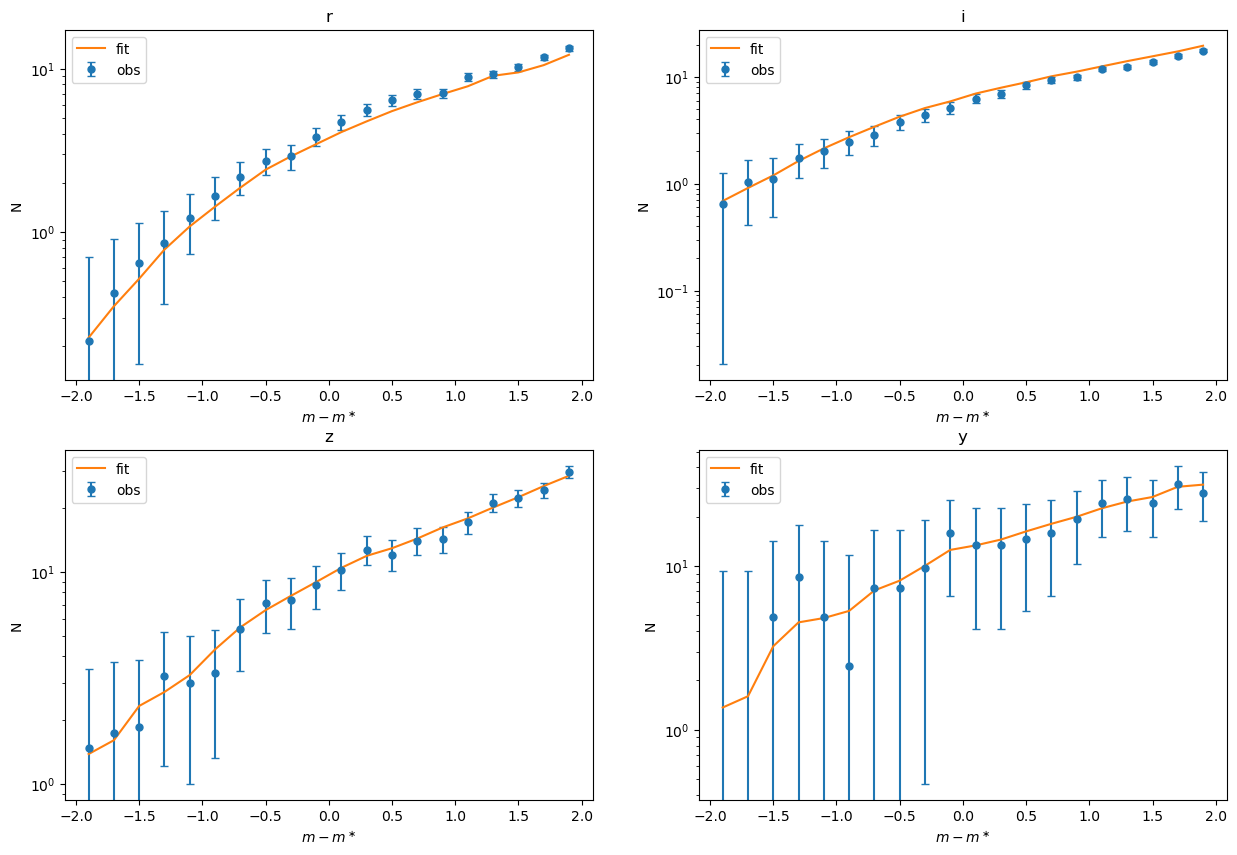

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(1, 5):
    this_axs = (axs.flat)[i - 1]
    this_axs.set_title(band_name[i])
    this_axs.errorbar(fitting.DIFF_MBINS, mean_obs_alllf[i] / mcmc_dict['unmasked_fraction'][i], 
                 np.std(obs_alllf[i] / mcmc_dict['unmasked_fraction'][i]) / len(obs_alllf[i])**0.5, 
                 fmt='o', markersize=5, capsize=3, label='obs')
    this_axs.plot(mbins[i] - mean_ms[i], (mean_bkg[i] + mean_purelf[i]), label='fit')
    this_axs.legend()
    this_axs.set_yscale('log')
    this_axs.set_xlabel(r'$m - m^\ast$')
    this_axs.set_ylabel('N')

In [45]:
rd_result = ut.pickle_load('result/bkg_lf20241111.pickle')

In [48]:
mcmc_dict.keys()

dict_keys(['obs_alllf', 'every_obs_bins', 'common_bkg_mean_d', 'common_bkg_std_d', 'bkg_bins', 'band', 'ms_model', 'log_mass', 'area', 'z', 'index', 'unmasked_fraction'])

In [47]:
rd_result.keys()

dict_keys(['filter', 'area', 'unmasked_fraction', 'all_raw_lf', 'all_corrected_lf', 'mean_lf', 'std_lf', 'mean_lf_d', 'std_lf_d'])

In [58]:
np.where(np.array(band_name) == mcmc_dict['band'][1])[0][0]

2

In [53]:
band_i = [np.where(band_name == mcmc_dict['band'][i])[0][0] for i in range(len(mcmc_dict['band']))]

/tmp/ipykernel_3230375/3821588818.py:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  band_i = [np.where(band_name == mcmc_dict['band'][i])[0][0] for i in range(len(mcmc_dict['band']))]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [51]:
obs_bkg = [rd_result['mean_lf_d'][band_index[i]] * mcmc_dict['area'][i] for i in range(len(mcmc_dict['area']))]

IndexError: index 8 is out of bounds for axis 0 with size 5

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i in range(1, 5):
    this_axs = (axs.flat)[i - 1]
    this_axs.set_title(band_name[i])
    this_axs.errorbar(fitting.DIFF_MBINS, mean_obs_alllf[i] / mcmc_dict['unmasked_fraction'][i], 
                 np.std(obs_alllf[i] / mcmc_dict['unmasked_fraction'][i]) / len(obs_alllf[i])**0.5, 
                 fmt='o', markersize=5, capsize=3, label='obs')
    this_axs.plot(mbins[i] - mean_ms[i], (mean_bkg[i] + mean_purelf[i]), label='fit')
    this_axs.legend()
    this_axs.set_yscale('log')
    this_axs.set_xlabel(r'$m - m^\ast$')
    this_axs.set_ylabel('N')

In [56]:
5/1.2

4.166666666666667

Text(0, 0.5, 'N')

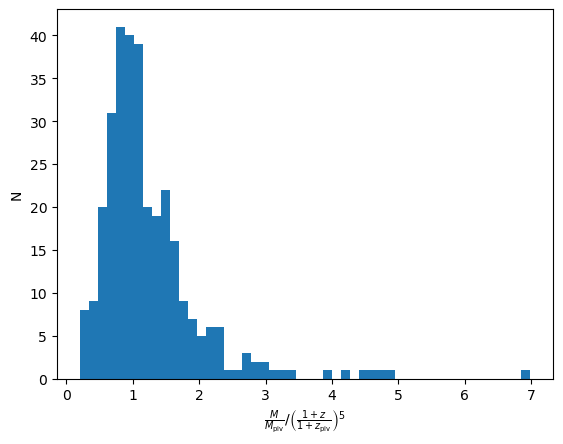

In [28]:
def z_func(z, gamma):
    z_piv = 0.4
    return ((1 + z) / (1 + z_piv))**gamma
def m_func(log_M, beta):
    M_piv = 10**14
    return (10**log_M / M_piv)**beta
z = mcmc_dict['z']
log_M = mcmc_dict['log_mass']
plt.hist(m_func(log_M, 1) / z_func(z, 5), 50)
plt.xlabel(r'$\frac{M}{M_{\rm piv}} / \left(\frac{1 + z}{1 + z_{\rm piv}}\right)^5$')
plt.ylabel('N')